<a href="https://colab.research.google.com/github/caua-sathler/NEURAL-NETWORKS/blob/main/MLP-SGD/MLP_Adam_Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"
column_names = [f"feature_{i}" for i in range(34)] + ["label"]

ionosphere = pd.read_csv(url, header=None, names=column_names)

ionosphere["label"] = ionosphere["label"].map({"b": 0, "g": 1})

In [ ]:
X = ionosphere.drop(columns=['label']).values
y = ionosphere['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_dim, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 16)
    self.fc5 = nn.Linear(16, output_dim)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.fc5(x)
    return x

model = MLP(input_dim=34, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.007)

In [ ]:
epochs = 120
batch_size = 32

for epoch in range(epochs):
    model.train()

    indices = torch.randperm(X_train.shape[0])
    X_train = X_train[indices]
    y_train = y_train[indices]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 10/120, Loss: 0.0127
Epoch 20/120, Loss: 0.1009
Epoch 30/120, Loss: 0.0004
Epoch 40/120, Loss: 0.0000
Epoch 50/120, Loss: 0.0000
Epoch 60/120, Loss: 0.0000
Epoch 70/120, Loss: 0.0000
Epoch 80/120, Loss: 0.0000
Epoch 90/120, Loss: 0.0000
Epoch 100/120, Loss: 0.0000
Epoch 110/120, Loss: 0.0000
Epoch 120/120, Loss: 0.0000


In [ ]:
model.eval()

with torch.no_grad():
  outputs = model(X_test)
  predictions = torch.argmax(outputs, dim=1).numpy()
  accuracy = (predictions == y_test).float().mean()
  print(f'Test set accuracy: {accuracy.item() * 100:.2f}%')

Test set accuracy: 96.23%


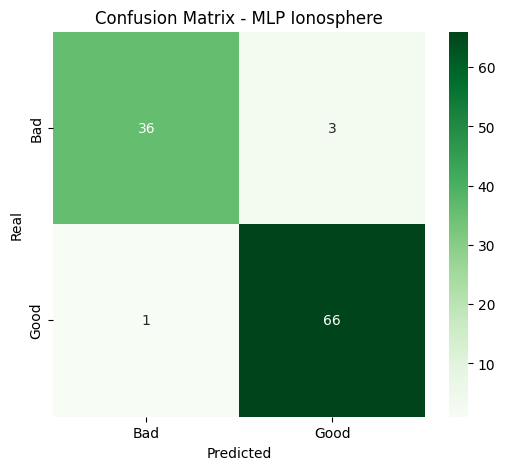

In [ ]:
conf_matrix = confusion_matrix(y_test.numpy(), predictions)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix - MLP Ionosphere")
plt.show()